In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
import re

In [3]:
dataset = pd.read_csv("../data/Master_dataset.csv")

In [4]:
def preprocess_string(s):
    s=s.lower()
    s=set(s.split("|"))
    s="|".join(s)
    s=s.replace("|"," ")
    preprocessed=re.sub("[^a-zA-Z\s]","",s)
    preprocessed=re.sub(r"\s{2,}", " ",preprocessed)
    return preprocessed

In [5]:
preprocess_string("bloody|Crime gone awry|dark humor|gangster's|imdb top 250")

'dark humor bloody imdb top gangsters crime gone awry'

In [6]:
train,test=train_test_split(dataset,test_size=0.35)
test,validation=train_test_split(dataset,test_size=0.5)

In [7]:
train.isnull().sum()

Unnamed: 0        0
user_tags         0
movie_tags    19814
rating            0
dtype: int64

In [8]:
def prep_data(data):
    data["user_tags"]=data["user_tags"].apply(lambda x: preprocess_string(x))
    data["movie_tags"]=data["movie_tags"].apply(lambda x: preprocess_string(x))
    data["user_tags_length"]=data["user_tags"].apply(lambda x: len(x.split("|")))
    data["movie_tags_length"]=data["tag"].apply(lambda x:len(x.split("|")))    
    return data

In [9]:
train = prep_data(train)
test = prep_data(test)
validation = prep_data(validation)

AttributeError: 'float' object has no attribute 'lower'

In [ ]:
user_item_data["user_tags_length"]=user_item_data["user_tags"].apply(lambda x: len(x))
user_item_data["movie_tag_length"]=dataset["tag"].apply(lambda x:len(x))

In [ ]:
dataset

,user_tags,tag,rating,user_tags_length,movie_tag_length
0,classic scifi,nonlinear violence storytelling violent gangst...,5.0,13,183
1,classic scifi,poignant stunning visual greed kurosawa cinema...,5.0,13,148
2,classic scifi,genetics futuristic technology dystopic future...,5.0,13,183
3,classic scifi,passionate visually appealing stunning dancing...,3.0,13,163
4,classic scifi,wizards scenic mythology oscar best effects vi...,4.0,13,207
...,...,...,...,...,...
3686636,creepy gothic,antisemitism silent horror talky criterion ori...,4.0,13,131
3686637,creepy gothic,demons dark fantasy amazing photography devil ...,4.0,13,153
3686638,creepy gothic,supernatural haunted house ominous eerie creep...,3.5,13,154
3686639,creepy gothic,supernatural adultery death revenge eerie cult...,4.0,13,134


In [ ]:
dataset.user_tags_length.max()

42545

In [ ]:
user_item_data.describe()

,rating,user_tags_length,movie_tag_length
count,3.686641e+06,3.686641e+06,3.686641e+06
mean,3.496950e+00,6.270065e+02,1.701543e+02
std,1.014067e+00,2.153688e+03,2.191981e+01
min,5.000000e-01,0.000000e+00,1.050000e+02
25%,3.000000e+00,2.600000e+01,1.550000e+02
50%,3.500000e+00,8.500000e+01,1.680000e+02
75%,4.000000e+00,3.790000e+02,1.840000e+02
max,5.000000e+00,4.254500e+04,2.600000e+02


In [ ]:
user_item_data["movie_tag_length"].max()

260

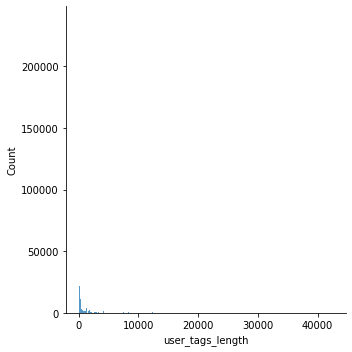

In [ ]:
sns.displot(user_item_data["user_tags_length"])

In [ ]:
user_item_data["rating"].value_counts()

4.0    904366
3.5    681464
3.0    602653
4.5    431394
5.0    365077
2.5    265619
2.0    207150
1.0     81941
1.5     81016
0.5     65961
Name: rating, dtype: int64

In [ ]:
user_item_data["rating"]=user_item_data["rating"].apply(lambda x: int(x+1))

In [ ]:
train,test=train_test_split(user_item_data,test_size=0.35)
test,validation=train_test_split(dataset,test_size=0.5)

In [ ]:
train.to_csv("../input/train_user_item.csv",index=False)
test.to_csv("../input/test_user_item.csv",index=False)
validation.to_csv("../input/validation_user_item.csv",index=False)